# Anchor ⚓️ 

Here’s a **literal breakdown** of vodka, rum, and whisky as **root, stem, and bud (seed)**, represented in essay-style sections with percentages for how well the fit holds based on the raw materials:

<iframe src="https://www.youtube.com/embed/EIlAM_XWDkA" style="width:100%;height:500px;"></iframe>

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
The difference between Whiskey, Rum and Vodka. The ingredients used, origin of each alcoholic beverage. Which of the three alcoholic drink is healthier and better. whiskey brandy rum vodka which is good for health. What is the alcoholic percentage in each drink. 
```

---

### **Vodka = Root**
Vodka is traditionally made from potatoes, a clear example of a **root**. Potatoes are tuberous roots that grow underground, making this a strong literal fit for vodka when potatoes are the raw material. However, a significant portion of vodka is made from grains like wheat, rye, or corn, which are seeds rather than roots. This makes the fit weaker for grain-based vodka.

#### **Fit Analysis**:
- Potato-based vodka: **100% fit**  
- Grain-based vodka: **20% fit** (roots are essential for plant growth but not the source of the grain).

---

### **Rum = Stem**
Rum is made from sugarcane juice or molasses, both derived from the stalk (stem) of the sugarcane plant. The stem is the primary source of the sugars needed for fermentation, making this a perfect literal fit. Unlike grains or roots, no part of the sugarcane outside the stem contributes significantly to rum production.

#### **Fit Analysis**:
- Sugarcane-based rum: **100% fit**

---

### **Whisky = Bud (Seed)**
Whisky is made from grains such as barley, rye, and corn. These grains are seeds, which form after the flowering phase of the plant. Buds are the precursors to flowers and seeds, so while “buds” aren’t literally the source of grains, they are an essential step in the biological process leading to seeds. The fit here is acceptable but not perfect; “seed” might be a more precise term than “bud.”

#### **Fit Analysis**:
- Grain-based whisky: **70% fit** (buds lead to seeds, but seeds are the direct source).

---

### Summary of Literal Fits
1. **Vodka = Root**: 
   - Potato-based vodka: **100%**
   - Grain-based vodka: **20%**
2. **Rum = Stem**:  
   - Sugarcane-based rum: **100%**
3. **Whisky = Bud (Seed)**:  
   - Grain-based whisky: **70%**

---

### Suggested Adjustment (Optional)
If precision matters most, **root, stem, seed** provides slightly better biological clarity, especially for whisky. However, **root, stem, bud** retains the developmental link between plant stages and the spirits' raw materials. Either framework works depending on your emphasis—accuracy or continuity.



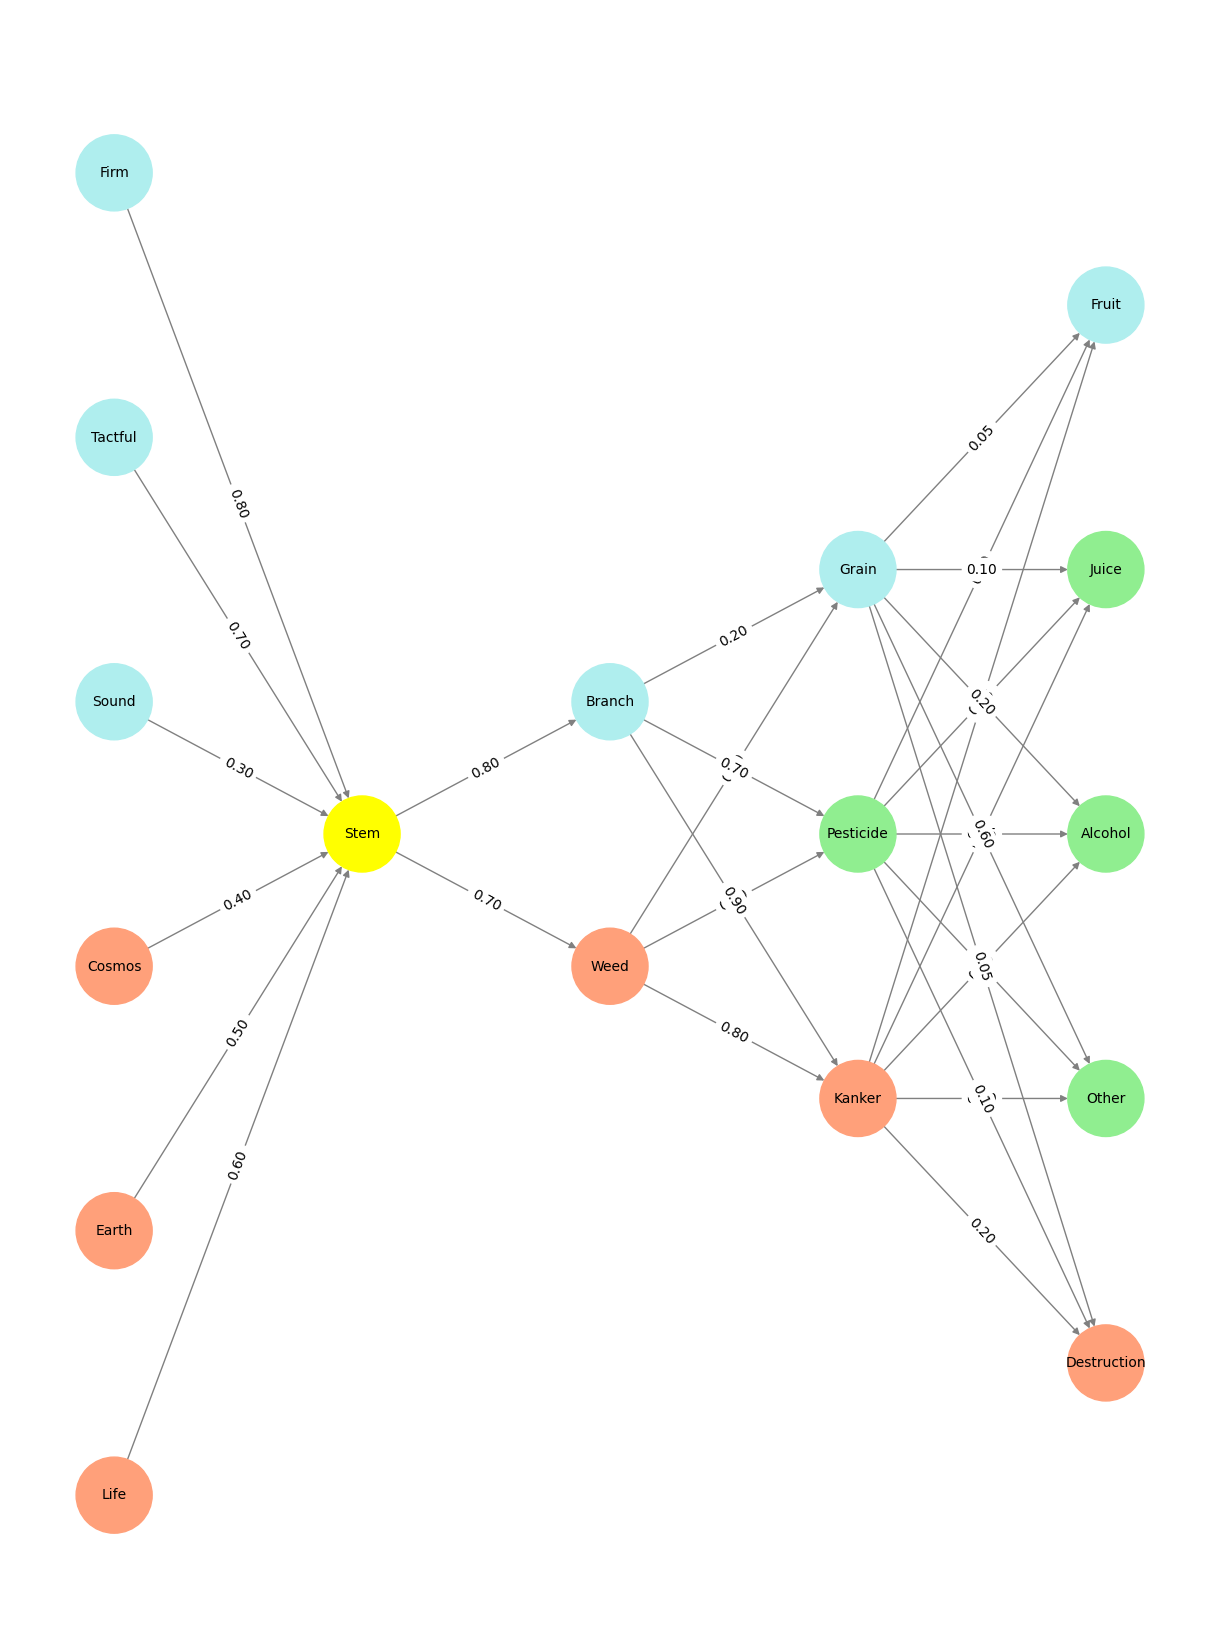

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Stem'],
        'Input': ['Weed', 'Branch'],
        'Hidden': [
            'Kanker',
            'Pesticide',
            'Grain',
        ],
        'Output': ['Destruction', 'Other', 'Alcohol', 'Juice', 'Fruit',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Stem':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Branch':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Grain':
            return 'paleturquoise'
        elif node == 'Pesticide':
            return 'lightgreen'
        elif node == 'Kanker':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Fruit':
            return 'paleturquoise'
        elif node in ['Juice', 'Alcohol', 'Other']:
            return 'lightgreen'
        elif node == 'Destruction':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ", fontsize=15)
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
If precision matters most, root, stem, seed provides slightly better biological clarity, especially for whisky. However, root, stem, bud retains the developmental link between plant stages and the spirits' raw materials. Either framework works depending on your emphasis—accuracy or continuity.
```

 